# Modeling Data

Machine learning and data science is about modeling data. **Modeling** is the representation of an idea into a mathematical equation. All machine learning methods are about training a computer to fit a model to some data. Even the fanciest terms like neural networks are simply choices for models. In this notebook we will begin to start building our first computational model of data.

## Modeling Data is Hard!

Let's pick up where we left off in the previous notebook with fruit. We were left with a riddle. When we load in images of apples and bananas

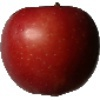

In [2]:
using Images
apple = load("10_100.jpg")

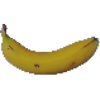

In [3]:
banana = load("104_100.jpg")

and then compare their average value for the color red, we end up with something paradoxical:

In [4]:
"The average value of red in the apple is $(mean(float.(red.(apple)))) while the average value of red in the banana is $(mean(float.(red.(banana))))"

"The average value of red in the apple is 0.57016706 while the average value of red in the banana is 0.90400153"

Were you able to guess why? There's actually two reasons. One of the reasons is the background. The image of the banana has a lot more background than the apple, and the white background has a red value of 1! In our minds we ignore the background and say "the banana is bright yellow, the apple is a dark red", but a computer just has a bundle of numbers and does not know where it should be looking.

But the other issue is that "bright yellow" isn't a color that exists in a computer. The computer has three colors: red, green, and blue. "Bright yellow" in a computer is a mixture of red and green, and it just so happens that to get this color yellow it needs more red than the apple!

In [5]:
"The amount of red in the apple at (60,60) is $(float(red(apple[60,60]))) while the amount of red in the banana at (60,60) is $(float(red(banana[60,60])))"

"The amount of red in the apple at (60,60) is 0.44705886 while the amount of red in the banana at (60,60) is 0.6666667"

This is a clear example that modeling data is hard!

## Take some time to think about the data

Apples and bananas are very different, but how do you use the RGB brightness to tell the difference between the two? Here's some quick ideas:

- We can use shape. But how can we encode ideas of shape from the array?
- We can use size. But how do we calculate size?
- We can use another color, or combinations of colors. What colors?

Let's go with the last route. The banana is yellow which is a combination of red and green, while the apple is red. This means that the color that clearly differentiates between the two is not red but green!

In [6]:
"The average value of green in the apple is $(mean(float.(green.(apple)))) while the average value of green in the banana is $(mean(float.(green.(banana))))"

"The average value of green in the apple is 0.33820274 while the average value of green in the banana is 0.88079727"

What we just did has fancy names. **Feature selection** is the process of subsetting the data to a more relevant and informative set. We took the full image data and decided to select out the green channel. **Data munging** is transforming the data into a format more suitable for modeling. Here, instead of keeping the full green channel, we transformed it down to a single data point: the average amount of green.

## Building a Model

We want to model the connection between "the average amount of green" and "is an apple or banana". This model is a mathematical function which takes in our data and spits out a number that we will interpret as "is an apple" or "is a banana".

[Diagram of an ML function]

We will interpret the output of the function as "is an apple" if the output is close to zero, and "is a banana" if it's close to one. Anything in the middle is something we are unsure about. A common function for performing this kind of **classification** is the sigmoid:

$$\sigma(x;w,b) := \frac{1}{1 + \exp(-wx + b)}$$

$$ x = data $$

$$ \sigma(x;w,b)=0 \implies apple$$

$$ \sigma(x;w,b) = 1 \implies banana $$

The `;` in the function differentiates from the **data** and the **parameters**. `x` is the data and is determined from the image. The parameters, `w` and `b`, are numbers which we choose to make our function match the results it should be modeling.

In [7]:
σ(x,w,b) = 1 / (1 + exp(-w*x+b))

σ (generic function with 1 method)

What we want is that when we give it the average green for the apple, `x=0.33820274`, it should give something close to 0 meaning apple. And when we give it `x=0.88079727`, it should output something close to 1 meaning banana.

We can understand how our choice of `w` and `b` effect our model by seeing how it changes the plot:

In [37]:
using Plots; gr()
using Interact
@manipulate for w in -10:0.01:30, b in 0:0.1:30
    plot(x->σ(x,w,b),0,1,label="Model",legend = :topleft,lw=3)
    scatter!([0.33820274],[σ(0.33820274,w,b)],label="Apple")
    scatter!([0.88079727],[σ(0.88079727,w,b)],label="Banana")
end

Interact.Options{:SelectionSlider,Any}(127: "input-47" = 10.0 Any , "w", 10.0, "10.0", 2001, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-10.0"=>-10.0,"-9.99"=>-9.99,"-9.98"=>-9.98,"-9.97"=>-9.97,"-9.96"=>-9.96,"-9.95"=>-9.95,"-9.94"=>-9.94,"-9.93"=>-9.93,"-9.92"=>-9.92,"-9.91"=>-9.91…), Dict{Any,Any}(Pair{Any,Any}(24.1, "24.1"),Pair{Any,Any}(-6.32, "-6.32"),Pair{Any,Any}(9.84, "9.84"),Pair{Any,Any}(-2.43, "-2.43"),Pair{Any,Any}(27.55, "27.55"),Pair{Any,Any}(23.28, "23.28"),Pair{Any,Any}(-3.89, "-3.89"),Pair{Any,Any}(-4.49, "-4.49"),Pair{Any,Any}(16.81, "16.81"),Pair{Any,Any}(15.21, "15.21")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(129: "input-48" = 15.0 Any , "b", 15.0, "15.0", 151, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(24.1, "24.1"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(15.6, "15.6"),Pair{Any,Any}(10.7, "10.7"),Pair{Any,Any}(13.2, "13.2"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(21.5, "21.5"),Pair{Any,Any}(7.4, "7.4"),Pair{Any,Any}(28.1, "28.1"),Pair{Any,Any}(29.0, "29.0")…)), Any[], Any[], true, "horizontal")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 0.000 
 
 
 0.001 
 
 
 0.002 
 
 
 0.003 
 
 
 0.004 
 
 
 0.005 
 
 
 0.006 
 
<polyline clip-path="url(#clip2902)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 60.9819,365.565 107.108,365.539 134.828,365.507 158.265,365.463 183.724,365.386 207.196,365.27 232.359,365.071 261.513,364.678 287.422,364.079 310.142,363.237 
 334.913,361.773 359.831,359.378 387.38,354.944 413.594,347.812 427.221,342.381 440.849,335.29 452.321,327.669 463.792,318.131 470.795,311.166 477.798,303.179 
 484.801,294.023 491.804,283.525 498.386,272.258 504.969,259.448 511.552,244.883 518.135,228.325 523.408,213.442 528.681,196.95 533.954,178.677 539.227,158.432 
 544.5,136.003 549.773,111.157 555.047,83.6367 560.32,53.1574 561.943,43.1327 563.566,32.7885 565.189,22.1145 
 "/>
 
 
 
 
 
 
 
 
 Model 
 
 
 
 
 Apple 
 
 
 
 
 Banana

Notice that the two parameters do two very different things. The **weight** `w` determines how fast the transition between 0 and 1 occurs. It encodes how trustworthy we think our data can actually is, and in what range we should be putting points between 0 and 1 and thus calling them "unsure". The **bias** encodes where on the x-axis the switch should take place. It can be seen as shifting the function left-right.

Here's some parameter choices that work well:

In [38]:
w = 25.58; b = 15.6
plot(x->σ(x,w,b),0,1,label="Model",legend = :topleft,lw=3)
scatter!([0.33820274],[σ(0.33820274,w,b)],label="Apple")
scatter!([0.88079727],[σ(0.88079727,w,b)],label="Banana")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip5902)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 54.4806,365.565 101.64,365.564 129.981,365.562 153.942,365.556 179.972,365.531 203.968,365.453 229.695,365.171 259.502,363.873 272.747,362.343 285.991,359.453 
 297.606,354.915 309.22,347.19 315.551,340.987 321.883,332.901 328.214,322.514 334.545,309.421 340.914,293.197 347.283,273.784 353.652,251.356 360.021,226.477 
 367.063,197.263 374.104,167.848 381.146,139.915 388.188,114.824 394.888,94.3388 401.588,77.3809 408.288,63.7914 414.988,53.1818 421.954,44.788 428.921,38.5411 
 435.887,33.9501 442.854,30.6071 454.582,26.9388 466.311,24.8379 494.949,22.7718 521.87,22.2745 564.999,22.1145 
 "/>
 
 
 
 
 
 
 
 
 Model 
 
 
 
 
 Apple 
 
 
 
 
 Banana

Once we have a model, we have a computational representation for how to choose between "apple" and "banana". Let's pull in some new images and see what our model says!

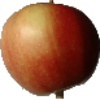

In [41]:
apple2 = load("107_100.jpg")

In [43]:
green_amt = mean(float.(green.(apple)))
w = 25.58; b = 15.6
plot(x->σ(x,w,b),0,1,label="Model",legend = :topleft,lw=3)
scatter!([0.33820274],[σ(0.33820274,w,b)],label="New Apple")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
 
 1.00 
 
<polyline clip-path="url(#clip6102)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 54.4806,365.565 101.64,365.564 129.981,365.562 153.942,365.556 179.972,365.531 203.968,365.453 229.695,365.171 259.502,363.873 272.747,362.343 285.991,359.453 
 297.606,354.915 309.22,347.19 315.551,340.987 321.883,332.901 328.214,322.514 334.545,309.421 340.914,293.197 347.283,273.784 353.652,251.356 360.021,226.477 
 367.063,197.263 374.104,167.848 381.146,139.915 388.188,114.824 394.888,94.3388 401.588,77.3809 408.288,63.7914 414.988,53.1818 421.954,44.788 428.921,38.5411 
 435.887,33.9501 442.854,30.6071 454.582,26.9388 466.311,24.8379 494.949,22.7718 521.87,22.2745 564.999,22.1145 
 "/>
 
 
 
 
 
 
 Model 
 
 
 
 
 New Apple

Our model successfully says that our new image is an apple! Pat yourself on the back: you've actually trained your first neural net.

## Closing Remarks: Bigger Models, More Data, More Accuracy

That last apple should start making you think: not all apples are that red and some are quite yellow. "redness" is one attribute of being an apple, but isn't the full thing. What we need to do is incorporate more ideas into our model by allowing more inputs. However, more inputs would mean more parameters to tweak. Also, we would like to have the computer start "learning" on its own. How do we take the next step?

The first thing to think about is, if you wanted to incorporate more data into the model, how would you change the sigmoid function? Play around with some ideas. But also, start thinking about how you chose parameters. What process did you do to finally end up at good parameters? These two problems (models with more data and automatically choosing parameters) are the last remaining step to understanding deep learning.